       popularity  danceability     energy        key   loudness       mode  \
count   50.000000     50.000000  50.000000  50.000000  50.000000  50.000000   
mean    53.640000      0.655060   0.658380   4.300000  -7.301360   0.640000   
std     15.759364      0.143897   0.202368   3.609794   2.389717   0.484873   
min     11.000000      0.330000   0.312000   0.000000 -12.434000   0.000000   
25%     46.250000      0.560750   0.480250   1.000000  -8.763500   0.000000   
50%     57.000000      0.673000   0.666500   4.000000  -7.217000   1.000000   
75%     63.750000      0.755750   0.833500   7.000000  -5.549750   1.000000   
max     80.000000      0.930000   0.990000  11.000000  -1.162000   1.000000   

       speechiness  acousticness  instrumentalness   liveness   valence  \
count    50.000000     50.000000         50.000000  50.000000  50.00000   
mean      0.099094      0.370887          0.061891   0.185302   0.59080   
std       0.078785      0.271341          0.207054   0.128453  

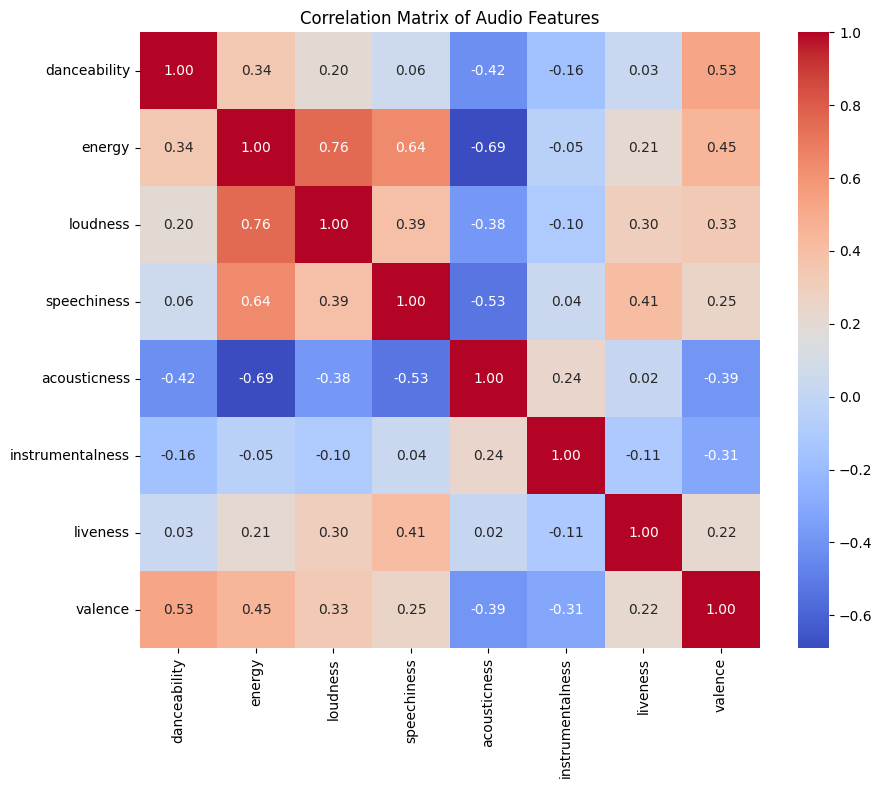

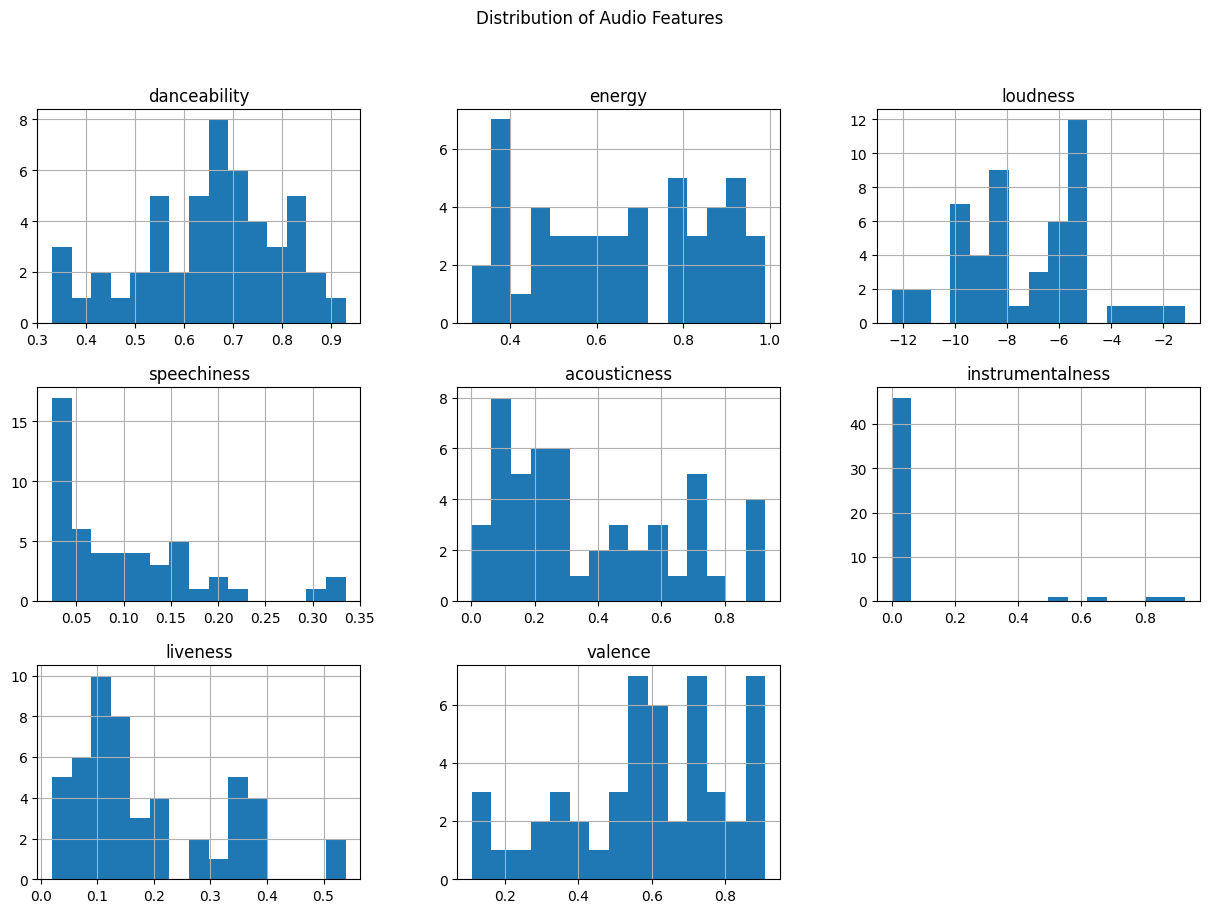

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('myTracksforAnalysisJuly28medium.csv')

# Describe the data
print(df.describe())

features_to_plot = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Create a correlation matrix with only the specified features
corr_matrix = df[features_to_plot].corr()
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Audio Features")
plt.show()

# Distribution of some audio features

df[features_to_plot].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Audio Features")
plt.show()


# Plot popularity vs. audio features
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='energy', y='popularity', hue='cluster', palette='viridis')
plt.title("Popularity vs. Energy")
plt.show()

# You can create similar plots for other features


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


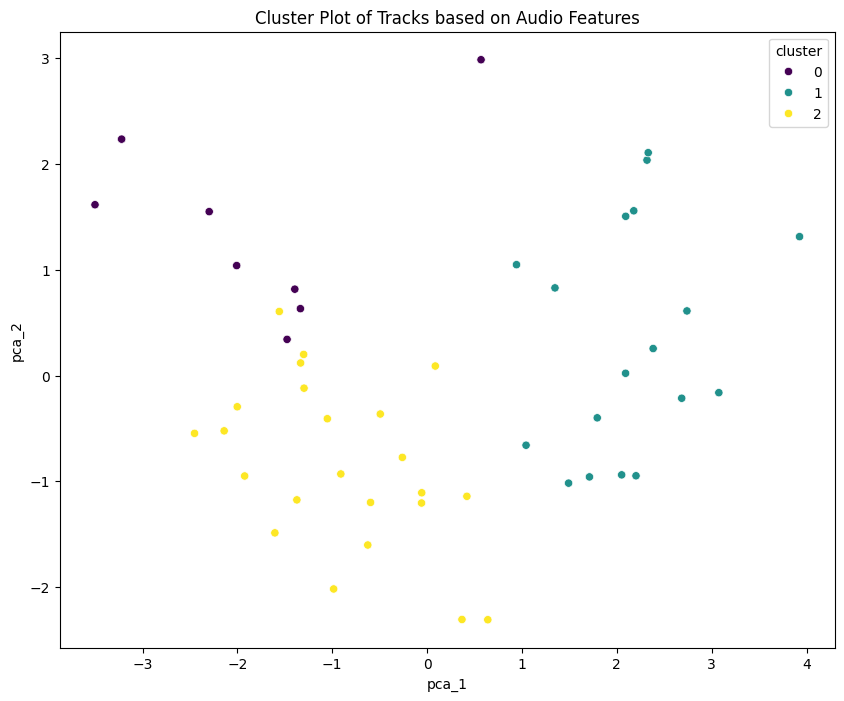

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df['pca_1'] = components[:, 0]
df['pca_2'] = components[:, 1]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='viridis')
plt.title("Cluster Plot of Tracks based on Audio Features")
plt.show()


In [3]:
# Display data points in each cluster
for cluster in df['cluster'].unique():
    print(f"Cluster {cluster}:")
    display(df[df['cluster'] == cluster])
    print("\n")


Cluster 1:


,name,artists,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster,pca_1,pca_2
0,"Aasa Kooda - From ""Think Indie""","Sai Abhyankkar, Sai Smriti",0MTdYgTZ25sLCO6kVnDoje,80,0.675,0.537,5,-9.401,1,0.0352,...,98.003,audio_features,spotify:track:0MTdYgTZ25sLCO6kVnDoje,https://api.spotify.com/v1/tracks/0MTdYgTZ25sL...,https://api.spotify.com/v1/audio-analysis/0MTd...,215510,4,1,1.491137,-1.017213
1,Periyone,Jithin Raj,6eSMc314qnbsO4sYxDGoqb,54,0.661,0.395,2,-8.051,1,0.0242,...,100.016,audio_features,spotify:track:6eSMc314qnbsO4sYxDGoqb,https://api.spotify.com/v1/tracks/6eSMc314qnbs...,https://api.spotify.com/v1/audio-analysis/6eSM...,325201,1,1,2.091982,0.021562
3,Tharangal,"Govind Vasantha, Jeba Niyaz, Siddharth Menon",5WFHOKxv1PY4hxetsOsT5D,39,0.330,0.382,2,-8.218,0,0.0332,...,150.106,audio_features,spotify:track:5WFHOKxv1PY4hxetsOsT5D,https://api.spotify.com/v1/tracks/5WFHOKxv1PY4...,https://api.spotify.com/v1/audio-analysis/5WFH...,325555,3,1,2.317853,2.037313
5,"Madhu Pakaroo - From ""Varshangalkku Shesham""","Amrit Ramnath, Vineeth Sreenivasan, Devu Khan ...",2KznzDFHXua8aCMcKLRi9d,60,0.686,0.337,4,-6.922,1,0.0339,...,144.887,audio_features,spotify:track:2KznzDFHXua8aCMcKLRi9d,https://api.spotify.com/v1/tracks/2KznzDFHXua8...,https://api.spotify.com/v1/audio-analysis/2Kzn...,234562,4,1,1.042893,-0.658706
9,The Beginning - Malayalam,"Christo Xavier, Atheena",5WrTRuPiJ0SA7AVtSgOQF5,47,0.602,0.496,2,-8.784,1,0.0490,...,146.131,audio_features,spotify:track:5WrTRuPiJ0SA7AVtSgOQF5,https://api.spotify.com/v1/tracks/5WrTRuPiJ0SA...,https://api.spotify.com/v1/audio-analysis/5WrT...,220768,4,1,1.347655,0.828947
14,"Jeevithagaadhakale - From ""Varshangalkku Shesham""","Amrit Ramnath, K. S. Chithra, Sreevalsan J Men...",3fsKbooGZuM3Ilk9Ub8eep,44,0.560,0.454,0,-7.348,1,0.0358,...,80.229,audio_features,spotify:track:3fsKbooGZuM3Ilk9Ub8eep,https://api.spotify.com/v1/tracks/3fsKbooGZuM3...,https://api.spotify.com/v1/audio-analysis/3fsK...,240066,4,1,1.793402,-0.399612
15,Omane,"Vijay Yesudas, Chinmayi, Rakshita Suresh",2dlGhG9K03ECc7PNsTlyVs,55,0.580,0.385,0,-12.250,0,0.0330,...,125.874,audio_features,spotify:track:2dlGhG9K03ECc7PNsTlyVs,https://api.spotify.com/v1/tracks/2dlGhG9K03EC...,https://api.spotify.com/v1/audio-analysis/2dlG...,358118,4,1,2.683666,-0.214454
21,Kun Faya Kun,"A.R. Rahman, Javed Ali, Mohit Chauhan",7F8RNvTQlvbeBLeenycvN6,72,0.362,0.378,1,-11.008,1,0.0329,...,87.549,audio_features,spotify:track:7F8RNvTQlvbeBLeenycvN6,https://api.spotify.com/v1/tracks/7F8RNvTQlvbe...,https://api.spotify.com/v1/audio-analysis/7F8R...,470500,4,1,3.075171,-0.161685
24,Hridhayavum,"Vineeth Sreenivasan, Jyotsna",49c8WVOkcKtTemZ7pN7kqI,51,0.699,0.471,4,-9.726,1,0.0366,...,109.994,audio_features,spotify:track:49c8WVOkcKtTemZ7pN7kqI,https://api.spotify.com/v1/tracks/49c8WVOkcKtT...,https://api.spotify.com/v1/audio-analysis/49c8...,305296,4,1,1.711275,-0.958217
26,Kanmani Anbodu Kadhalan,"Ilaiyaraaja, Vaali, Kamal Haasan, S. Janaki",0kXzsjjSOF8CRLSO8ZGHdG,50,0.480,0.572,2,-9.479,1,0.1300,...,126.048,audio_features,spotify:track:0kXzsjjSOF8CRLSO8ZGHdG,https://api.spotify.com/v1/tracks/0kXzsjjSOF8C...,https://api.spotify.com/v1/audio-analysis/0kXz...,335043,4,1,2.330622,2.107489




Cluster 2:


,name,artists,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster,pca_1,pca_2
2,Illuminati,"Sushin Shyam, Dabzee, Vinayak Sasikumar",1a1xLj9W8libnO9PvJf6ao,72,0.783,0.817,11,-5.940,0,0.1240,...,138.002,audio_features,spotify:track:1a1xLj9W8libnO9PvJf6ao,https://api.spotify.com/v1/tracks/1a1xLj9W8lib...,https://api.spotify.com/v1/audio-analysis/1a1x...,212525,4,2,-1.297590,-0.119162
4,"Kutty Kudiye (From ""Premalu"")","Vishnu Vijay, Suhail Koya, Sanjith Hegde",4Equ5LEIUjA1pKLprqfF9n,62,0.814,0.571,0,-8.251,1,0.1090,...,97.994,audio_features,spotify:track:4Equ5LEIUjA1pKLprqfF9n,https://api.spotify.com/v1/tracks/4Equ5LEIUjA1...,https://api.spotify.com/v1/audio-analysis/4Equ...,184836,4,2,0.419176,-1.141787
8,"Mini Maharani (From ""Premalu"")","Vishnu Vijay, Suhail Koya, Kapil Kapilan, Vagu...",2CPjVH7irjP1H9Na7VbhrN,62,0.785,0.826,7,-5.658,1,0.0688,...,136.016,audio_features,spotify:track:2CPjVH7irjP1H9Na7VbhrN,https://api.spotify.com/v1/tracks/2CPjVH7irjP1...,https://api.spotify.com/v1/audio-analysis/2CPj...,245276,4,2,-1.923524,-0.949680
10,"Katchi Sera - From ""Think Indie""",Sai Abhyankkar,1zzejMGRYKP5XOa3FmzXfa,74,0.765,0.642,7,-8.480,0,0.1150,...,148.465,audio_features,spotify:track:1zzejMGRYKP5XOa3FmzXfa,https://api.spotify.com/v1/tracks/1zzejMGRYKP5...,https://api.spotify.com/v1/audio-analysis/1zze...,181818,3,2,-1.051871,-0.408088
11,Ballaatha Jaathi,"NJ, BABY JEAN, Dabzee, Rzee",4tYxGORIOZSPLnZmrSpva7,71,0.832,0.618,1,-7.086,0,0.1410,...,95.980,audio_features,spotify:track:4tYxGORIOZSPLnZmrSpva7,https://api.spotify.com/v1/tracks/4tYxGORIOZSP...,https://api.spotify.com/v1/audio-analysis/4tYx...,230000,4,2,-1.373154,-1.175498
16,Mathapithakkale,"Sushin Shyam, Malayali Monkeys, MC Couper, Vin...",7afMnPC5xnakX22CVazUqK,62,0.854,0.859,1,-5.541,0,0.0553,...,114.996,audio_features,spotify:track:7afMnPC5xnakX22CVazUqK,https://api.spotify.com/v1/tracks/7afMnPC5xnak...,https://api.spotify.com/v1/audio-analysis/7afM...,209342,4,2,-0.261079,-0.773693
17,Lajjavathiye,Jassie Gift,7n4224MEBhKhAZoLwNfA5x,54,0.871,0.858,10,-9.753,0,0.1000,...,110.707,audio_features,spotify:track:7n4224MEBhKhAZoLwNfA5x,https://api.spotify.com/v1/tracks/7n4224MEBhKh...,https://api.spotify.com/v1/audio-analysis/7n42...,277866,4,2,-0.985501,-2.017912
18,"Naa Ready (From ""Leo"")","Anirudh Ravichander, Thalapathy Vijay, Asal Ko...",1B02UI29t3PTh3m98absaP,68,0.726,0.805,1,-5.576,1,0.1530,...,87.956,audio_features,spotify:track:1B02UI29t3PTh3m98absaP,https://api.spotify.com/v1/tracks/1B02UI29t3PT...,https://api.spotify.com/v1/audio-analysis/1B02...,248182,4,2,-0.909731,-0.930412
19,Aarumughan,Rimi Tomy,28Y3lWGCOfdsxvjOD6Kpwe,21,0.563,0.603,0,-5.910,1,0.0966,...,87.940,audio_features,spotify:track:28Y3lWGCOfdsxvjOD6Kpwe,https://api.spotify.com/v1/tracks/28Y3lWGCOfds...,https://api.spotify.com/v1/audio-analysis/28Y3...,248267,4,2,-0.058860,-1.205089
20,Naakka Mukka,"Vijay Antony, Chorus",6aUstpsARWZwKY7x2wKvtI,60,0.661,0.990,6,-1.162,0,0.1010,...,95.017,audio_features,spotify:track:6aUstpsARWZwKY7x2wKvtI,https://api.spotify.com/v1/tracks/6aUstpsARWZw...,https://api.spotify.com/v1/audio-analysis/6aUs...,303464,4,2,-1.558254,0.605943




Cluster 0:


,name,artists,id,popularity,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster,pca_1,pca_2
6,Armadham,"Sushin Shyam, Pranavam Sasi, Vinayak Sasikumar",18afrwnlrByAjhi3Ve0Ehn,72,0.711,0.788,9,-6.404,1,0.223,...,146.968,audio_features,spotify:track:18afrwnlrByAjhi3Ve0Ehn,https://api.spotify.com/v1/tracks/18afrwnlrByA...,https://api.spotify.com/v1/audio-analysis/18af...,173714,4,0,-1.394859,0.816925
7,Odimaga,"Sushin Shyam, Nazriya Nazim, Vinayak Sasikumar",2qu6IQOzoAIgzCSLX2RXVQ,65,0.512,0.684,4,-9.533,0,0.191,...,149.971,audio_features,spotify:track:2qu6IQOzoAIgzCSLX2RXVQ,https://api.spotify.com/v1/tracks/2qu6IQOzoAIg...,https://api.spotify.com/v1/audio-analysis/2qu6...,171200,4,0,0.568337,2.986534
12,Appadipodu,"KK, Anuradha Sriram, Pa. Vijay",5KoNpOzoHj7BppaLcncjWW,62,0.687,0.802,10,-7.078,0,0.157,...,168.013,audio_features,spotify:track:5KoNpOzoHj7BppaLcncjWW,https://api.spotify.com/v1/tracks/5KoNpOzoHj7B...,https://api.spotify.com/v1/audio-analysis/5KoN...,291275,4,0,-1.476479,0.342136
13,Kadharalz,Anirudh Ravichander,77OQsnAirm7Ke8EGgBeOxz,73,0.671,0.902,1,-5.411,1,0.298,...,160.025,audio_features,spotify:track:77OQsnAirm7Ke8EGgBeOxz,https://api.spotify.com/v1/tracks/77OQsnAirm7K...,https://api.spotify.com/v1/audio-analysis/77OQ...,234023,4,0,-3.501146,1.615408
22,Pistah,"Rajesh Murugesan, Shabareesh Varma",4oWyW7U9YVox9jqTar9k0V,62,0.625,0.766,6,-8.062,0,0.165,...,171.921,audio_features,spotify:track:4oWyW7U9YVox9jqTar9k0V,https://api.spotify.com/v1/tracks/4oWyW7U9YVox...,https://api.spotify.com/v1/audio-analysis/4oWy...,146933,4,0,-1.335857,0.632685
25,"Galatta - From ""Aavesham""","Sushin Shyam, Paal Dabba, Vinayak Sasikumar",6hA8stAJBcUFivvkhEEBeq,65,0.552,0.930,9,-5.228,1,0.335,...,169.849,audio_features,spotify:track:6hA8stAJBcUFivvkhEEBeq,https://api.spotify.com/v1/tracks/6hA8stAJBcUF...,https://api.spotify.com/v1/audio-analysis/6hA8...,130019,4,0,-3.220672,2.235575
32,Aaluma Doluma,"Anirudh Ravichander, Badshah",1Do2hDE0etMakAEQbyOd4L,55,0.544,0.917,1,-5.853,1,0.201,...,160.672,audio_features,spotify:track:1Do2hDE0etMakAEQbyOd4L,https://api.spotify.com/v1/tracks/1Do2hDE0etMa...,https://api.spotify.com/v1/audio-analysis/1Do2...,258032,4,0,-2.297344,1.550084
34,Galatta,"Sushin Shyam, Paal Dabba, Vinayak Sasikumar",28x6WpVq1ty4dPDeqK0zPO,62,0.552,0.930,9,-5.228,1,0.335,...,169.849,audio_features,spotify:track:28x6WpVq1ty4dPDeqK0zPO,https://api.spotify.com/v1/tracks/28x6WpVq1ty4...,https://api.spotify.com/v1/audio-analysis/28x6...,130019,4,0,-3.220672,2.235575
36,"Whistle Podu (From ""The Greatest Of All Time"")","Thalapathy Vijay, Yuvan Shankar Raja, Madan Karky",6GH5qLVhOvbgRvqFdAKQ9a,67,0.646,0.882,1,-5.665,1,0.177,...,162.041,audio_features,spotify:track:6GH5qLVhOvbgRvqFdAKQ9a,https://api.spotify.com/v1/tracks/6GH5qLVhOvbg...,https://api.spotify.com/v1/audio-analysis/6GH5...,281269,4,0,-2.007717,1.039992


In [4]:
import plotly.express as px
import plotly.graph_objects as go

# Create custom hover text for all tracks
df['hover_text'] = df.apply(lambda row: f"Track: {row['name']}<br>Cluster: {row['cluster']}", axis=1)

# Create the main scatter plot
fig = px.scatter(
    df,
    x='pca_1',
    y='pca_2',
    color='cluster',
    title="Interactive Cluster Plot of Tracks based on Audio Features",
    hover_name='hover_text'  # This will show custom hover text
)

# Highlight one representative track from each cluster
highlight_indices = []
for cluster in df['cluster'].unique():
    highlight_indices.append(df[df['cluster'] == cluster].index[0])  # Select the first track from each cluster

# Add custom markers for the highlighted tracks
for idx in highlight_indices:
    track = df.loc[idx]
    fig.add_trace(go.Scatter(
        x=[track['pca_1']],
        y=[track['pca_2']],
        mode='markers+text',
        marker=dict(size=12, color='red', symbol='diamond'),
        text=track['hover_text'],
        textposition='top center',
        showlegend=False
    ))

fig.show()


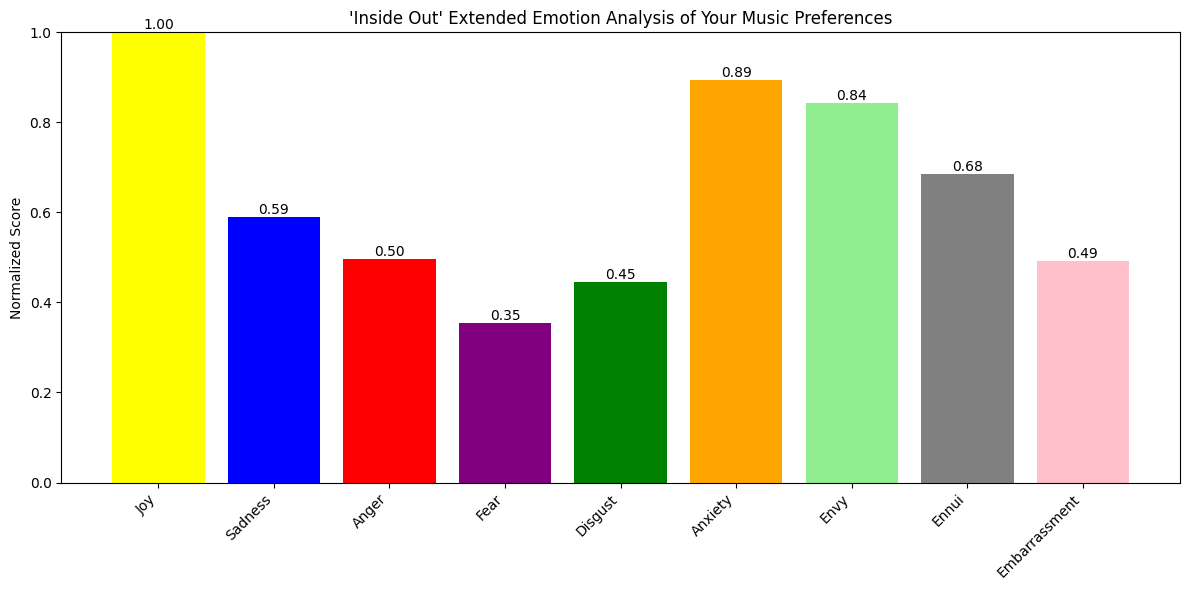

Joy: 1.00
Sadness: 0.59
Anger: 0.50
Fear: 0.35
Disgust: 0.45
Anxiety: 0.89
Envy: 0.84
Ennui: 0.68
Embarrassment: 0.49


In [5]:

import numpy as np
import matplotlib.pyplot as plt



# Define the features we'll use for each emotion
emotion_features = {
    'Joy': ['valence', 'energy', 'danceability'],
    'Sadness': ['valence', 'energy', 'acousticness'],
    'Anger': ['energy', 'loudness', 'valence'],
    'Fear': ['instrumentalness', 'valence', 'energy'],
    'Disgust': ['valence', 'energy', 'speechiness'],
    'Anxiety': ['energy', 'valence', 'tempo'],
    'Envy': ['energy', 'valence', 'popularity'],
    'Ennui': ['energy', 'valence', 'acousticness'],
    'Embarrassment': ['energy', 'valence', 'liveness']
}

# Calculate emotion scores
emotion_scores = {}

for emotion, features in emotion_features.items():
    if emotion == 'Joy':
        emotion_scores[emotion] = np.mean([df[feature].mean() for feature in features])
    elif emotion == 'Sadness':
        emotion_scores[emotion] = np.mean([1 - df['valence'].mean(), 1 - df['energy'].mean(), df['acousticness'].mean()])
    elif emotion == 'Anger':
        emotion_scores[emotion] = np.mean([df['energy'].mean(), df['loudness'].mean() / 60, 1 - df['valence'].mean()])  # Normalize loudness
    elif emotion == 'Fear':
        emotion_scores[emotion] = np.mean([df['instrumentalness'].mean(), 1 - df['valence'].mean(), df['energy'].std()])
    elif emotion == 'Disgust':
        emotion_scores[emotion] = np.mean([1 - df['valence'].mean(), 1 - df['energy'].mean(), df['speechiness'].mean()])
    elif emotion == 'Anxiety':
        emotion_scores[emotion] = np.mean([df['energy'].mean(), 1 - df['valence'].mean(), df['tempo'].mean() / 200])  # Normalize tempo
    elif emotion == 'Envy':
        emotion_scores[emotion] = np.mean([df['energy'].mean(), 1 - df['valence'].mean(), df['popularity'].mean() / 100])
    elif emotion == 'Ennui':
        emotion_scores[emotion] = np.mean([1 - df['energy'].mean(), df['valence'].mean(), df['acousticness'].mean()])
    elif emotion == 'Embarrassment':
        emotion_scores[emotion] = np.mean([1 - df['energy'].mean(), 1 - df['valence'].mean(), df['liveness'].mean()])

# Normalize scores
max_score = max(emotion_scores.values())
for emotion in emotion_scores:
    emotion_scores[emotion] /= max_score

# Create a color map for the emotions
color_map = {
    'Joy': 'yellow', 'Sadness': 'blue', 'Anger': 'red', 'Fear': 'purple', 'Disgust': 'green',
    'Anxiety': 'orange', 'Envy': 'lightgreen', 'Ennui': 'gray', 'Embarrassment': 'pink'
}

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(emotion_scores.keys(), emotion_scores.values(), color=[color_map[e] for e in emotion_scores.keys()])
plt.title("'Inside Out' Extended Emotion Analysis of Your Music Preferences")
plt.ylabel("Normalized Score")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the scores
for emotion, score in emotion_scores.items():
    print(f"{emotion}: {score:.2f}")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



# Define the features we'll use for each emotion
emotion_features = {
    'Joy': ['valence', 'energy', 'danceability'],
    'Sadness': ['valence', 'energy', 'acousticness'],
    'Anger': ['energy', 'loudness', 'valence'],
    'Fear': ['instrumentalness', 'valence', 'energy'],
    'Disgust': ['valence', 'energy', 'speechiness'],
    'Anxiety': ['energy', 'valence', 'tempo'],
    'Envy': ['energy', 'valence', 'popularity'],
    'Ennui': ['energy', 'valence', 'acousticness'],
    'Embarrassment': ['energy', 'valence', 'liveness']
}

# # Calculate emotion scores
# for emotion, features in emotion_features.items():
#     if emotion == 'Joy':
#         df[emotion] = df[features].mean(axis=1)
#     elif emotion == 'Sadness':
#         df[emotion] = (1 - df[['valence', 'energy']]).mean(axis=1) + df['acousticness']
#     elif emotion == 'Anger':
#         df[emotion] = df['energy'] + df['loudness'] / 60 + (1 - df['valence'])
#     elif emotion == 'Fear':
#         df[emotion] = df['instrumentalness'] + (1 - df['valence']) + df['energy']
#     elif emotion == 'Disgust':
#         df[emotion] = (1 - df[['valence', 'energy']]).mean(axis=1) + df['speechiness']
#     elif emotion == 'Anxiety':
#         df[emotion] = df['energy'] + (1 - df['valence']) + df['tempo'] / 200
#     elif emotion == 'Envy':
#         df[emotion] = df['energy'] + (1 - df['valence']) + df['popularity'] / 100
#     elif emotion == 'Ennui':
#         df[emotion] = (1 - df['energy']) + df['valence'] + df['acousticness']
#     elif emotion == 'Embarrassment':
#         df[emotion] = (1 - df[['energy', 'valence']]).mean(axis=1) + df['liveness']

# Normalize the loudness feature
df['loudness_normalized'] = df['loudness'] / 60

# Calculate emotion scores with some adjustments
for emotion, features in emotion_features.items():
    if emotion == 'Joy':
        df[emotion] = df[['valence', 'energy', 'danceability']].mean(axis=1)
    elif emotion == 'Sadness':
        df[emotion] = (1 - df['valence'] + (1 - df['energy']) + df['acousticness']) / 3
    elif emotion == 'Anger':
        df[emotion] = (df['energy'] + df['loudness_normalized'] + df['tempo'] / 200) / 3
    elif emotion == 'Fear':
        df[emotion] = (df['instrumentalness'] + df['loudness_normalized'] + df['tempo'] / 200) / 3
    elif emotion == 'Disgust':
        df[emotion] = ((1 - df['valence']) + (1 - df['acousticness']) + df['speechiness']) / 3
    elif emotion == 'Anxiety':
        df[emotion] = (df['energy'] + (1 - df['valence']) + df['tempo'] / 200) / 3
    elif emotion == 'Envy':
        df[emotion] = ((1 - df['valence']) + df['loudness_normalized'] + (1 - df['acousticness']) + df['speechiness']) / 4
    elif emotion == 'Ennui':
        df[emotion] = ((1 - df['energy']) + (1 - df['valence']) + df['tempo'].apply(lambda x: 1 if x < 90 else 0)) / 3
    elif emotion == 'Embarrassment':
        df[emotion] = ((1 - df['energy']) + (1 - df['loudness_normalized']) + 
                       df['speechiness'] + df['instrumentalness']) / 4



# Normalize the emotion scores
emotions = list(emotion_features.keys())
scaler = MinMaxScaler()
df[emotions] = scaler.fit_transform(df[emotions])


In [7]:
df[['name'] + emotions]


,name,Joy,Sadness,Anger,Fear,Disgust,Anxiety,Envy,Ennui,Embarrassment
0,"Aasa Kooda - From ""Think Indie""",0.529206,0.534850,0.224614,0.077862,0.369252,0.379761,0.352793,0.373669,0.316489
1,Periyone,0.262266,0.852905,0.121357,0.103716,0.430871,0.537484,0.434021,0.621849,0.384665
2,Illuminati,0.766939,0.268423,0.731937,0.288812,0.614034,0.809830,0.650351,0.206162,0.157764
3,Tharangal,0.000000,0.806147,0.342776,0.307640,0.683509,0.856961,0.691744,0.687955,0.400621
4,"Kutty Kudiye (From ""Premalu"")",0.617991,0.467147,0.274737,0.092711,0.539321,0.431030,0.542958,0.366387,0.328915
5,"Madhu Pakaroo - From ""Varshangalkku Shesham""",0.528621,0.582095,0.296075,0.303658,0.157976,0.236484,0.168161,0.380392,0.415701
6,Armadham,0.633762,0.306415,0.739577,0.319801,0.848186,0.943078,0.885132,0.293557,0.244317
7,Odimaga,0.369159,0.391603,0.606410,1.000000,1.000000,1.000000,1.000000,0.435854,0.871951
8,"Mini Maharani (From ""Premalu"")",0.970794,0.039014,0.735495,0.284513,0.406686,0.493638,0.440743,0.011765,0.114020
9,The Beginning - Malayalam,0.214369,0.604013,0.422686,0.313513,0.956790,0.962497,0.965435,0.634734,0.367406


In [8]:

# Perform K-means clustering
n_clusters = len(emotions)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[emotions])

# Map clusters to emotions based on their characteristics
cluster_centers = kmeans.cluster_centers_
emotion_mapping = {i: emotions[np.argmax(center)] for i, center in enumerate(cluster_centers)}

# Add emotion names to the dataframe
df['emotion_island'] = df['cluster'].map(emotion_mapping)

# Define colors for each emotion
emotion_colors = {
    'Joy': '#FFD700',  # Gold
    'Sadness': '#1E90FF',  # Dodger Blue
    'Anger': '#FF4500',  # Orange Red
    'Fear': '#800080',  # Purple
    'Disgust': '#32CD32',  # Lime Green
    'Anxiety': '#ED9121',  # Dark Orange
    'Envy': '#ADFF2F',  # Green Yellow
    'Ennui': '#D8BFD8',  # Thistle
    'Embarrassment': '#FF69B4'  # Hot Pink
}

# Map cluster numbers to colors
df['color'] = df['cluster'].map(lambda cluster: emotion_colors[emotion_mapping[cluster]])

# Create hover text with track names and assigned emotions
df['hover_text'] = df.apply(lambda row: f"Track: {row['name']}<br>Emotion: {row['emotion_island']}", axis=1)

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='valence', y='energy', color='emotion_island',
                 hover_name='name', hover_data={'emotion_island': True, 'hover_text': True, 'valence': False, 'energy': False, 'color': False},
                 color_discrete_map=emotion_colors, title='Emotion Islands in Your Music Library')

# Customize the layout
fig.update_layout(title={'text': "Emotion Islands in Your Music Library", 'x': 0.5},
                  xaxis_title='Valence', yaxis_title='Energy')

# Show the plot
fig.show()

# Print some statistics about each emotion island
for cluster, emotion in emotion_mapping.items():
    cluster_size = (df['cluster'] == cluster).sum()
    print(f"\n{emotion} Island:")
    print(f"Number of songs: {cluster_size}")
    print("Top 5 artists:")
    print(df[df['cluster'] == cluster]['artists'].value_counts().head())
    print("\nAverage features:")
    print(df[df['cluster'] == cluster][emotions].mean())

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Anger Island:
Number of songs: 14
Top 5 artists:
artists
Sushin Shyam, Paal Dabba, Vinayak Sasikumar       2
Sushin Shyam, Dabzee, Vinayak Sasikumar           1
Sushin Shyam, Pranavam Sasi, Vinayak Sasikumar    1
KK, Anuradha Sriram, Pa. Vijay                    1
Anirudh Ravichander                               1
Name: count, dtype: int64

Average features:
Joy              0.785005
Sadness          0.156241
Anger            0.867890
Fear             0.359570
Disgust          0.656501
Anxiety          0.861709
Envy             0.700083
Ennui            0.126090
Embarrassment    0.146938
dtype: float64

Sadness Island:
Number of songs: 6
Top 5 artists:
artists
Amrit Ramnath, Vineeth Sreenivasan, Devu Khan Manganiyar            1
Amrit Ramnath, K. S. Chithra, Sreevalsan J Menon, Mithun Jayaraj    1
A.R. Rahman, Javed Ali, Mohit Chauhan                               1
Vineeth Sreenivasan, Jyotsna                                        1
M. M. Keeravani, K. S. Chithra, P. Unnikrishnan  

In [9]:
import plotly.express as px
import plotly.graph_objects as go


# Map clusters to emotion names based on inspection of clusters
# This is a manual step where you assign a label to each cluster based on its characteristics
emotion_mapping = {0: 'Joy', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Disgust',
                   5: 'Anxiety', 6: 'Envy', 7: 'Ennui', 8: 'Embarrassment'}

df['emotion_island'] = df['cluster'].map(emotion_mapping)

# Ensure the dataframe has a 'track_name' column
# Add custom hover text using track names and emotions
df['hover_text'] = df.apply(lambda row: f"Track: {row['name']}<br>Emotion: {row['emotion_island']}", axis=1)

# Create the main scatter plot
fig = px.scatter(
    df,
    x='valence',
    y='energy',
    color='emotion_island',
    title="Interactive K means Cluster Plot of Tracks based on Audio Features",
    hover_name='hover_text'  # This will show custom hover text
)

# # Highlight one representative track from each cluster
# highlight_indices = []
# for cluster in df['cluster'].unique():
#     highlight_indices.append(df[df['cluster'] == cluster].index[0])  # Select the first track from each cluster

# # Add custom markers for the highlighted tracks
# for idx in highlight_indices:
#     track = df.loc[idx]
#     fig.add_trace(go.Scatter(
#         x=[track['valence']],
#         y=[track['energy']],
#         mode='markers+text',
#         marker=dict(size=12, color='red', symbol='diamond'),
#         text=[track['hover_text']],
#         textposition='top center',
#         showlegend=False
#     ))

# # Customize the plot colors to match the emotion colors
# for emotion, color in emotion_colors.items():
#     fig.for_each_trace(lambda trace: trace.update(marker_color=color) if trace.name == str(emotion_mapping) else ())

# fig.show()

# Customize the plot colors
emotion_colors = {
    'Joy': '#FEE644',        # Yellow
    'Sadness': '#3498db',    # Blue
    'Anger': '#e74c3c',      # Red
    'Fear': '#34495e',       # Dark Gray
    'Disgust': '#2ecc71',    # Green
    'Anxiety': '#e67e22',    # Orange
    'Envy': '#e67e22',       # Orange (Carrot Orange)
    'Ennui': '#8e44ad',      # Light Purple
    'Embarrassment': '#2c3e50'  # Dark Gray (or another color you choose)
}

for emotion, color in emotion_colors.items():
    fig.for_each_trace(lambda trace: trace.update(marker_color=color) if trace.name == emotion else None)

fig.show()

In [10]:
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Assuming you have a DataFrame 'df' with calculated emotion scores
emotion_features = list(emotion_features.keys())  # Extracting feature names
X = df[emotion_features]

# Define the number of clusters
n_clusters = len(emotion_features)  # You can adjust this number based on analysis

# Fit the GMM model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['cluster'] = gmm.fit_predict(X)

# Map clusters to emotion names based on inspection of clusters
# This is a manual step where you assign a label to each cluster based on its characteristics
# emotion_mapping = {0: 'Joy', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Disgust',
#                    5: 'Anxiety', 6: 'Envy', 7: 'Ennui', 8: 'Embarrassment'}

# Map clusters to emotions based on their characteristics
cluster_centers = gmm.means_
emotion_mapping = {i: emotions[np.argmax(center)] for i, center in enumerate(cluster_centers)}

df['emotion_island'] = df['cluster'].map(emotion_mapping)

# Add hover text with track names and assigned emotions
df['hover_text'] = df.apply(lambda row: f"Track: {row['name']}<br>Emotion: {row['emotion_island']}", axis=1)

# Plotting the clusters with Plotly
fig = px.scatter(
    df,
    x='valence',
    y='energy',
    color='emotion_island',
    title="Interactive GMM Clustering of Tracks Based on Audio Features",
    hover_name='hover_text'
)

# Customize the plot colors
emotion_colors = {
    'Joy': '#FEE644',        # Yellow
    'Sadness': '#3498db',    # Blue
    'Anger': '#e74c3c',      # Red
    'Fear': '#34495e',       # Dark Gray
    'Disgust': '#2ecc71',    # Green
    'Anxiety': '#e67e22',    # Orange
    'Envy': '#e67e22',       # Orange (Carrot Orange)
    'Ennui': '#8e44ad',      # Light Purple
    'Embarrassment': '#2c3e50'  # Dark Gray (or another color you choose)
}

for emotion, color in emotion_colors.items():
    fig.for_each_trace(lambda trace: trace.update(marker_color=color) if trace.name == emotion else None)

fig.show()


In [11]:
from sklearn.cluster import SpectralClustering
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame 'df' with calculated emotion scores

X = df[emotion_features]

# Define the number of clusters
n_clusters = len(set(emotion_features))  # Adjust this number based on analysis or context

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
df['cluster'] = spectral.fit_predict(X)

# Map clusters to emotion names based on inspection of clusters
# This mapping should be done after inspecting the clusters formed
emotion_mapping = {0: 'Joy', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Disgust',
                   5: 'Anxiety', 6: 'Envy', 7: 'Ennui', 8: 'Embarrassment'}

df['emotion_island'] = df['cluster'].map(emotion_mapping)

# Add hover text with track names and assigned emotions
df['hover_text'] = df.apply(lambda row: f"Track: {row['name']}<br>Emotion: {row['emotion_island']}", axis=1)

# Plotting the clusters with Plotly
fig = px.scatter(
    df,
    x='valence',
    y='energy',
    color='emotion_island',
    title="Interactive Spectral Clustering of Tracks Based on Audio Features",
    hover_name='hover_text'
)

# Customize the plot colors
emotion_colors = {
    'Joy': '#FEE644',        # Yellow
    'Sadness': '#3498db',    # Blue
    'Anger': '#e74c3c',      # Red
    'Fear': '#34495e',       # Dark Gray
    'Disgust': '#2ecc71',    # Green
    'Anxiety': '#e67e22',    # Orange
    'Envy': '#e67e22',       # Orange (Carrot Orange)
    'Ennui': '#8e44ad',      # Light Purple
    'Embarrassment': '#2c3e50'  # Dark Gray (or another color you choose)
}

for emotion, color in emotion_colors.items():
    fig.for_each_trace(lambda trace: trace.update(marker_color=color) if trace.name == emotion else None)

fig.show()

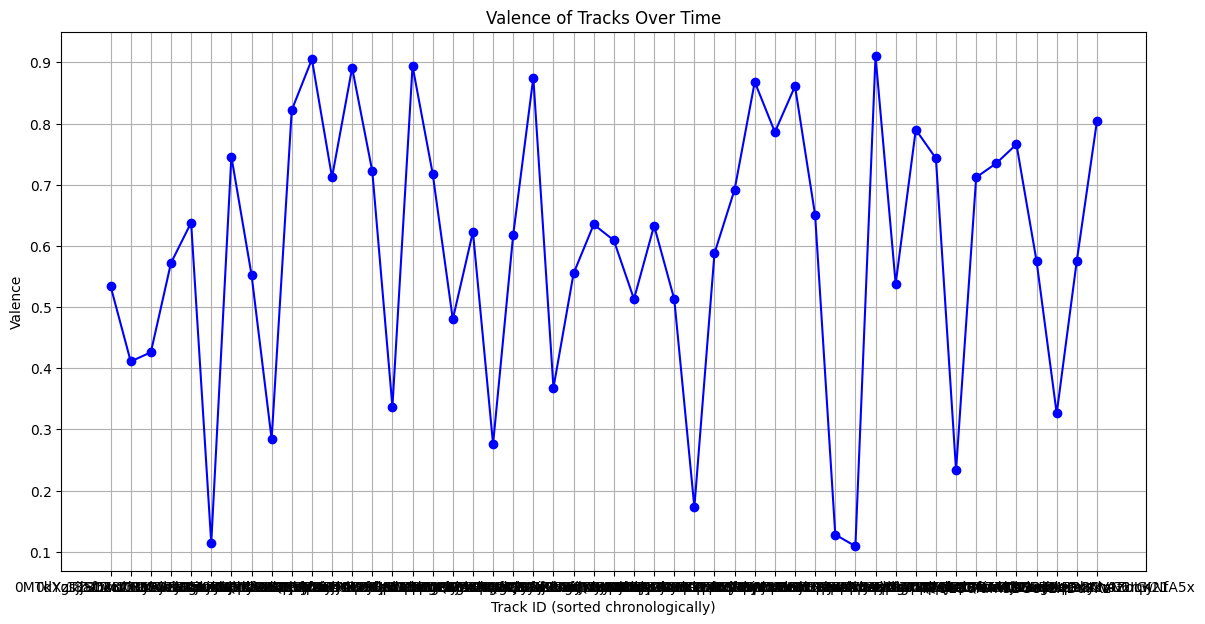

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame has the relevant columns
if 'valence' in df.columns and 'duration_ms' in df.columns:
    # Convert duration from milliseconds to minutes
    df['duration_minutes'] = df['duration_ms'] / 60000

    # Assuming the 'id' column is unique for each track
    df_sorted = df.sort_values(by='id')

    # Plot valence over time
    plt.figure(figsize=(14, 7))
    plt.plot(df_sorted['id'], df_sorted['valence'], marker='o', linestyle='-', color='b')
    plt.xlabel('Track ID (sorted chronologically)')
    plt.ylabel('Valence')
    plt.title('Valence of Tracks Over Time')
    plt.grid(True)
    plt.show()
else:
    print("The DataFrame does not contain the required columns: 'valence' and 'duration_ms'")


Average Valence: 0.59


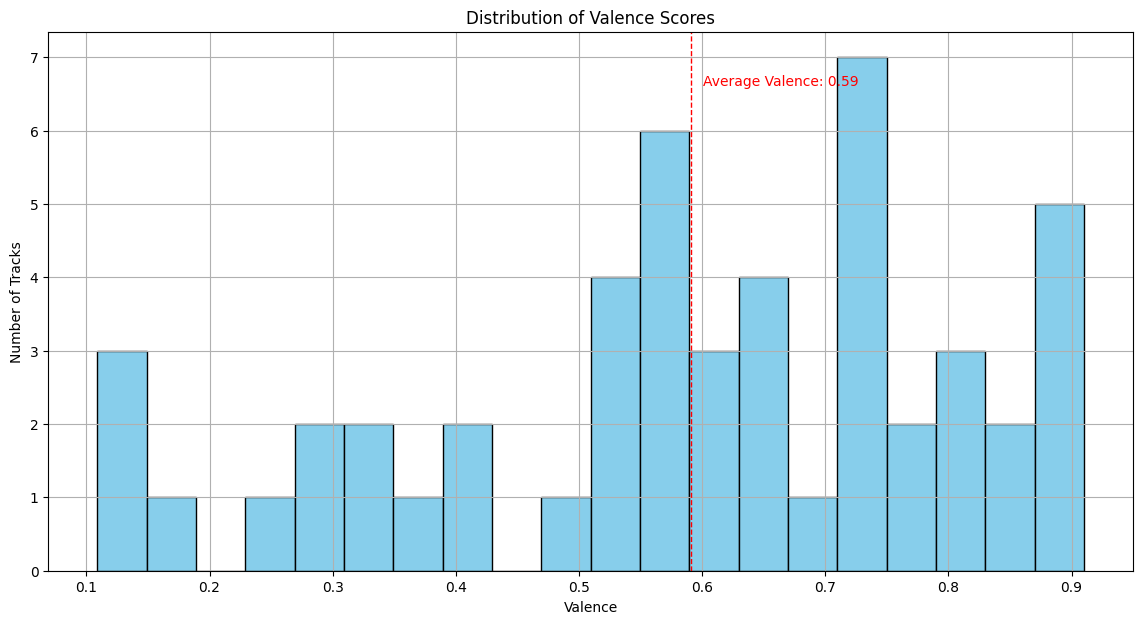

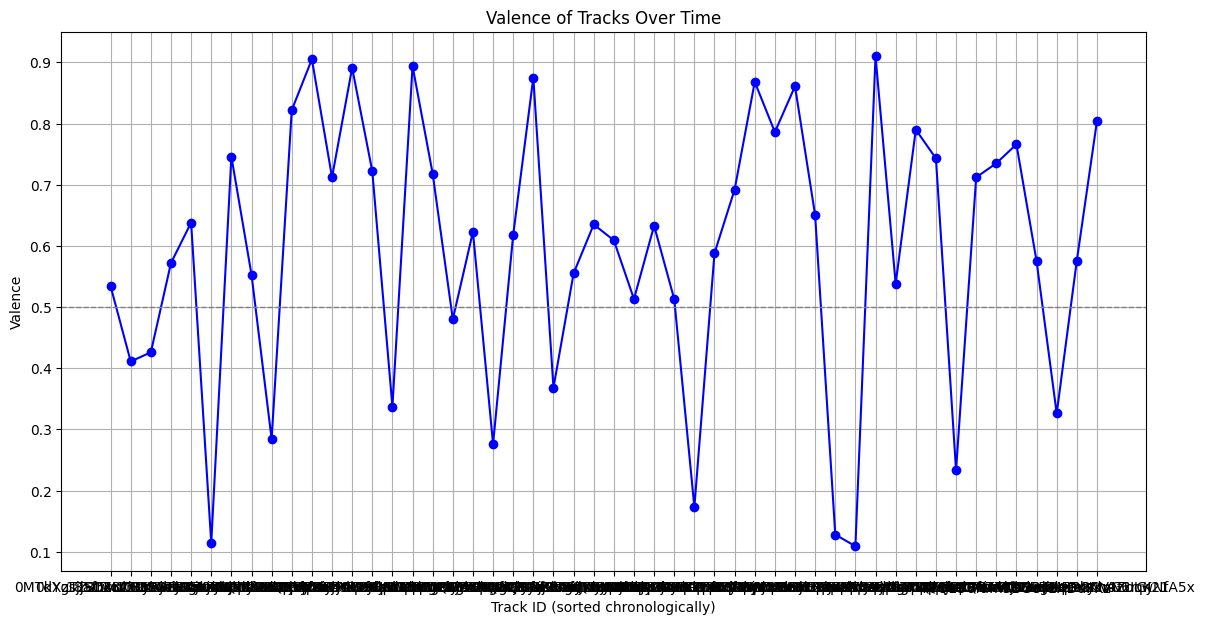

In [13]:
# Calculate the average valence
average_valence = df['valence'].mean()
print(f'Average Valence: {average_valence:.2f}')

# Plot the distribution of valence
plt.figure(figsize=(14, 7))
plt.hist(df['valence'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_valence, color='red', linestyle='dashed', linewidth=1)
plt.text(average_valence+0.01, plt.ylim()[1]*0.9, f'Average Valence: {average_valence:.2f}', color='red')
plt.xlabel('Valence')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Valence Scores')
plt.grid(True)
plt.show()

# Assuming 'id' or another column represents chronological order
df_sorted = df.sort_values(by='id')

# Plot valence over time
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['id'], df_sorted['valence'], marker='o', linestyle='-', color='b')
plt.xlabel('Track ID (sorted chronologically)')
plt.ylabel('Valence')
plt.title('Valence of Tracks Over Time')
plt.axhline(0.5, color='grey', linestyle='--', linewidth=1)  # Mood threshold line
plt.grid(True)
plt.show()

                    artist  count
3             Sushin Shyam      7
5        Vinayak Sasikumar      7
28           K. S. Chithra      5
27     Anirudh Ravichander      4
31           Vijay Yesudas      4
0           Sai Abhyankkar      2
12           Amrit Ramnath      2
64  Anna Katharina Valayil      2
37        Thalapathy Vijay      2
59          Shreya Ghoshal      2


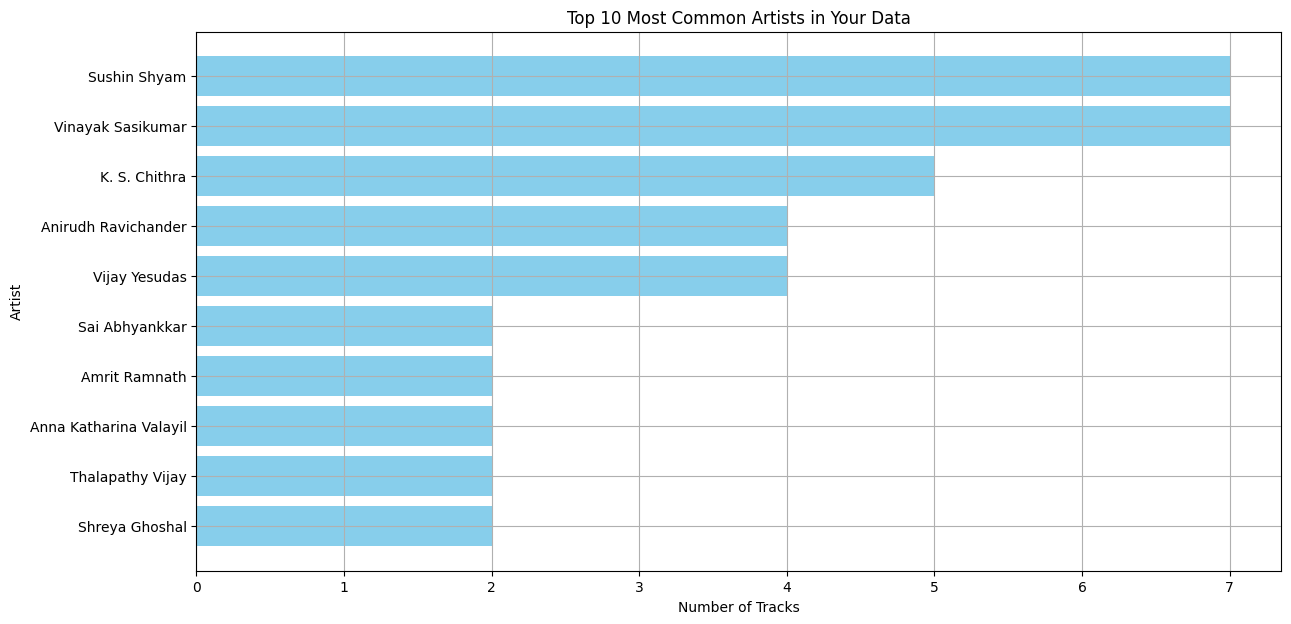

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Example DataFrame (df) structure:
# df = pd.DataFrame({
#     'name': [...],
#     'artists': [...],  # Assume this is a string representation of lists
#     'id': [...],
#     ...
# })

# Preprocess the 'artists' column if it contains lists as strings
# Convert string representation of list to actual list
df['artists'] = df['artists'].apply(lambda x: x.split(', '))

# Flatten the list of artists and count occurrences
all_artists = [artist for sublist in df['artists'] for artist in sublist]
artist_counts = Counter(all_artists)

# Convert to a DataFrame for easier plotting
artist_counts_df = pd.DataFrame(artist_counts.items(), columns=['artist', 'count'])
artist_counts_df = artist_counts_df.sort_values(by='count', ascending=False)

# Print the top 10 most common artists
print(artist_counts_df.head(10))

# Plot the top 10 most common artists
plt.figure(figsize=(14, 7))
plt.barh(artist_counts_df.head(10)['artist'][::-1], artist_counts_df.head(10)['count'][::-1], color='skyblue')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Top 10 Most Common Artists in Your Data')
plt.grid(True)
plt.show()


In [15]:
# Compare the popularity of your favorite tracks with their average characteristics
top_tracks = df.nlargest(10, 'popularity')
average_characteristics = df[['popularity', 'danceability', 'energy', 'valence']].mean()

print("Average Characteristics of Your Top 10 Tracks:")
print(top_tracks[['name', 'artists', 'popularity', 'danceability', 'energy', 'valence']])
print("\nOverall Average Characteristics:")
print(average_characteristics)


Average Characteristics of Your Top 10 Tracks:
                                              name  \
0                  Aasa Kooda - From "Think Indie"   
10                Katchi Sera - From "Think Indie"   
13                                       Kadharalz   
2                                       Illuminati   
6                                         Armadham   
21                                    Kun Faya Kun   
11                                Ballaatha Jaathi   
37                                  Chand Sifarish   
18                          Naa Ready (From "Leo")   
36  Whistle Podu (From "The Greatest Of All Time")   

                                              artists  popularity  \
0                        [Sai Abhyankkar, Sai Smriti]          80   
10                                   [Sai Abhyankkar]          74   
13                              [Anirudh Ravichander]          73   
2           [Sushin Shyam, Dabzee, Vinayak Sasikumar]          72   
6    [Sushin 

C:\Users\arjun\AppData\Local\Temp\ipykernel_8416\1668000187.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



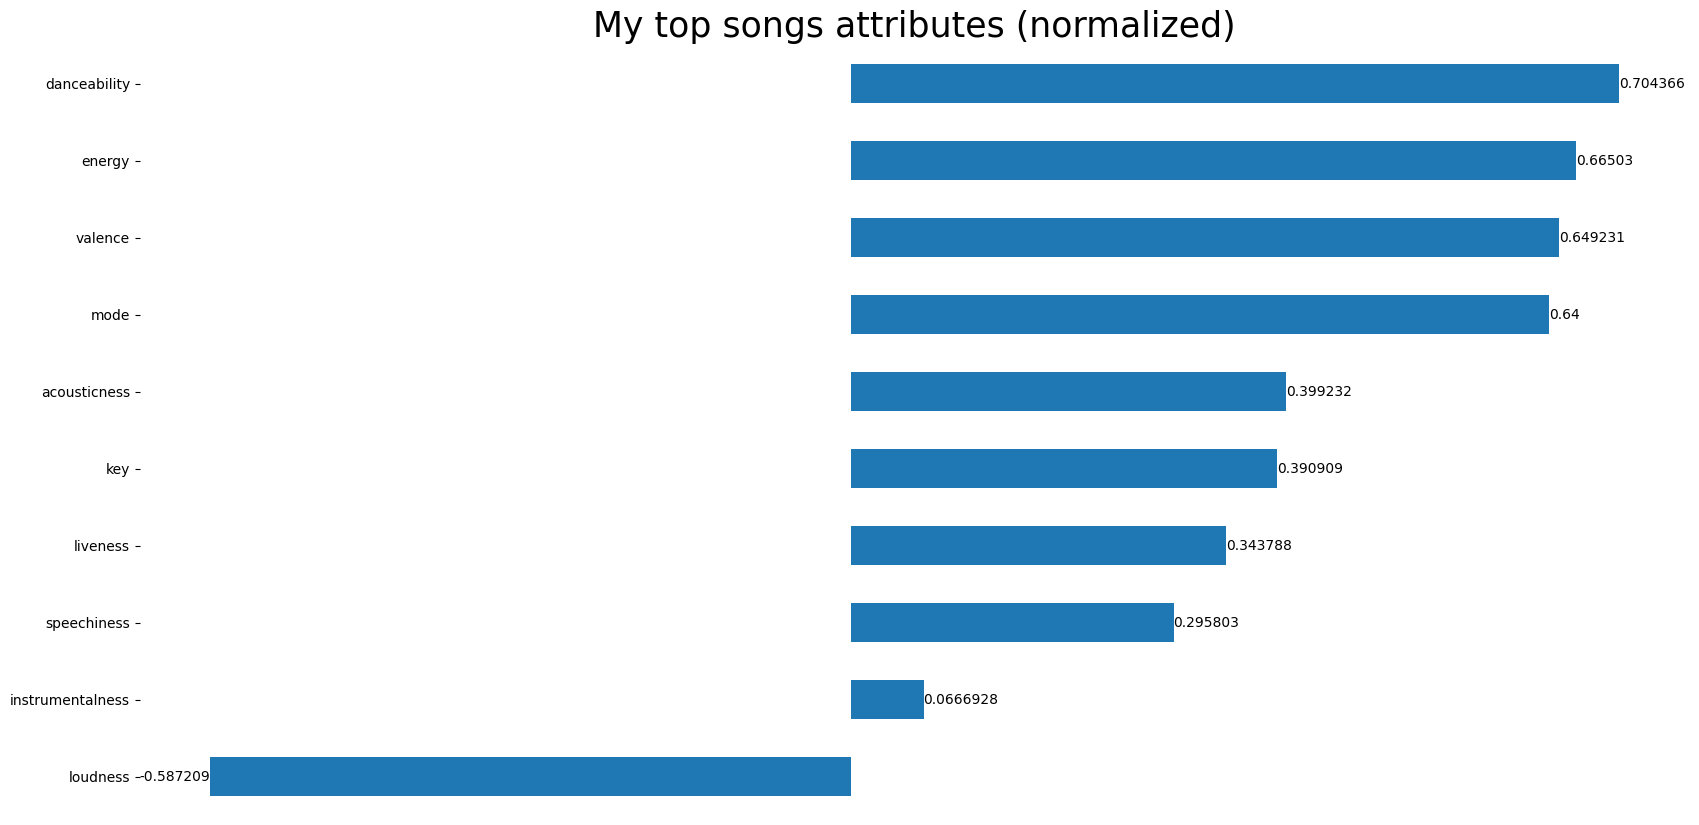

In [16]:
df_attributes = df[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']]


for column in df_attributes.columns:
    df_attributes[column] = df_attributes[column]  / df_attributes[column].abs().max()


ax = df_attributes.mean().sort_values(ascending=True).plot(kind="barh", figsize=(20, 10), ) 
ax.get_xaxis().set_visible(False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.title('My top songs attributes (normalized)').set_size(25)
plt.bar_label(ax.containers[0])
plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_8416\3349547459.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



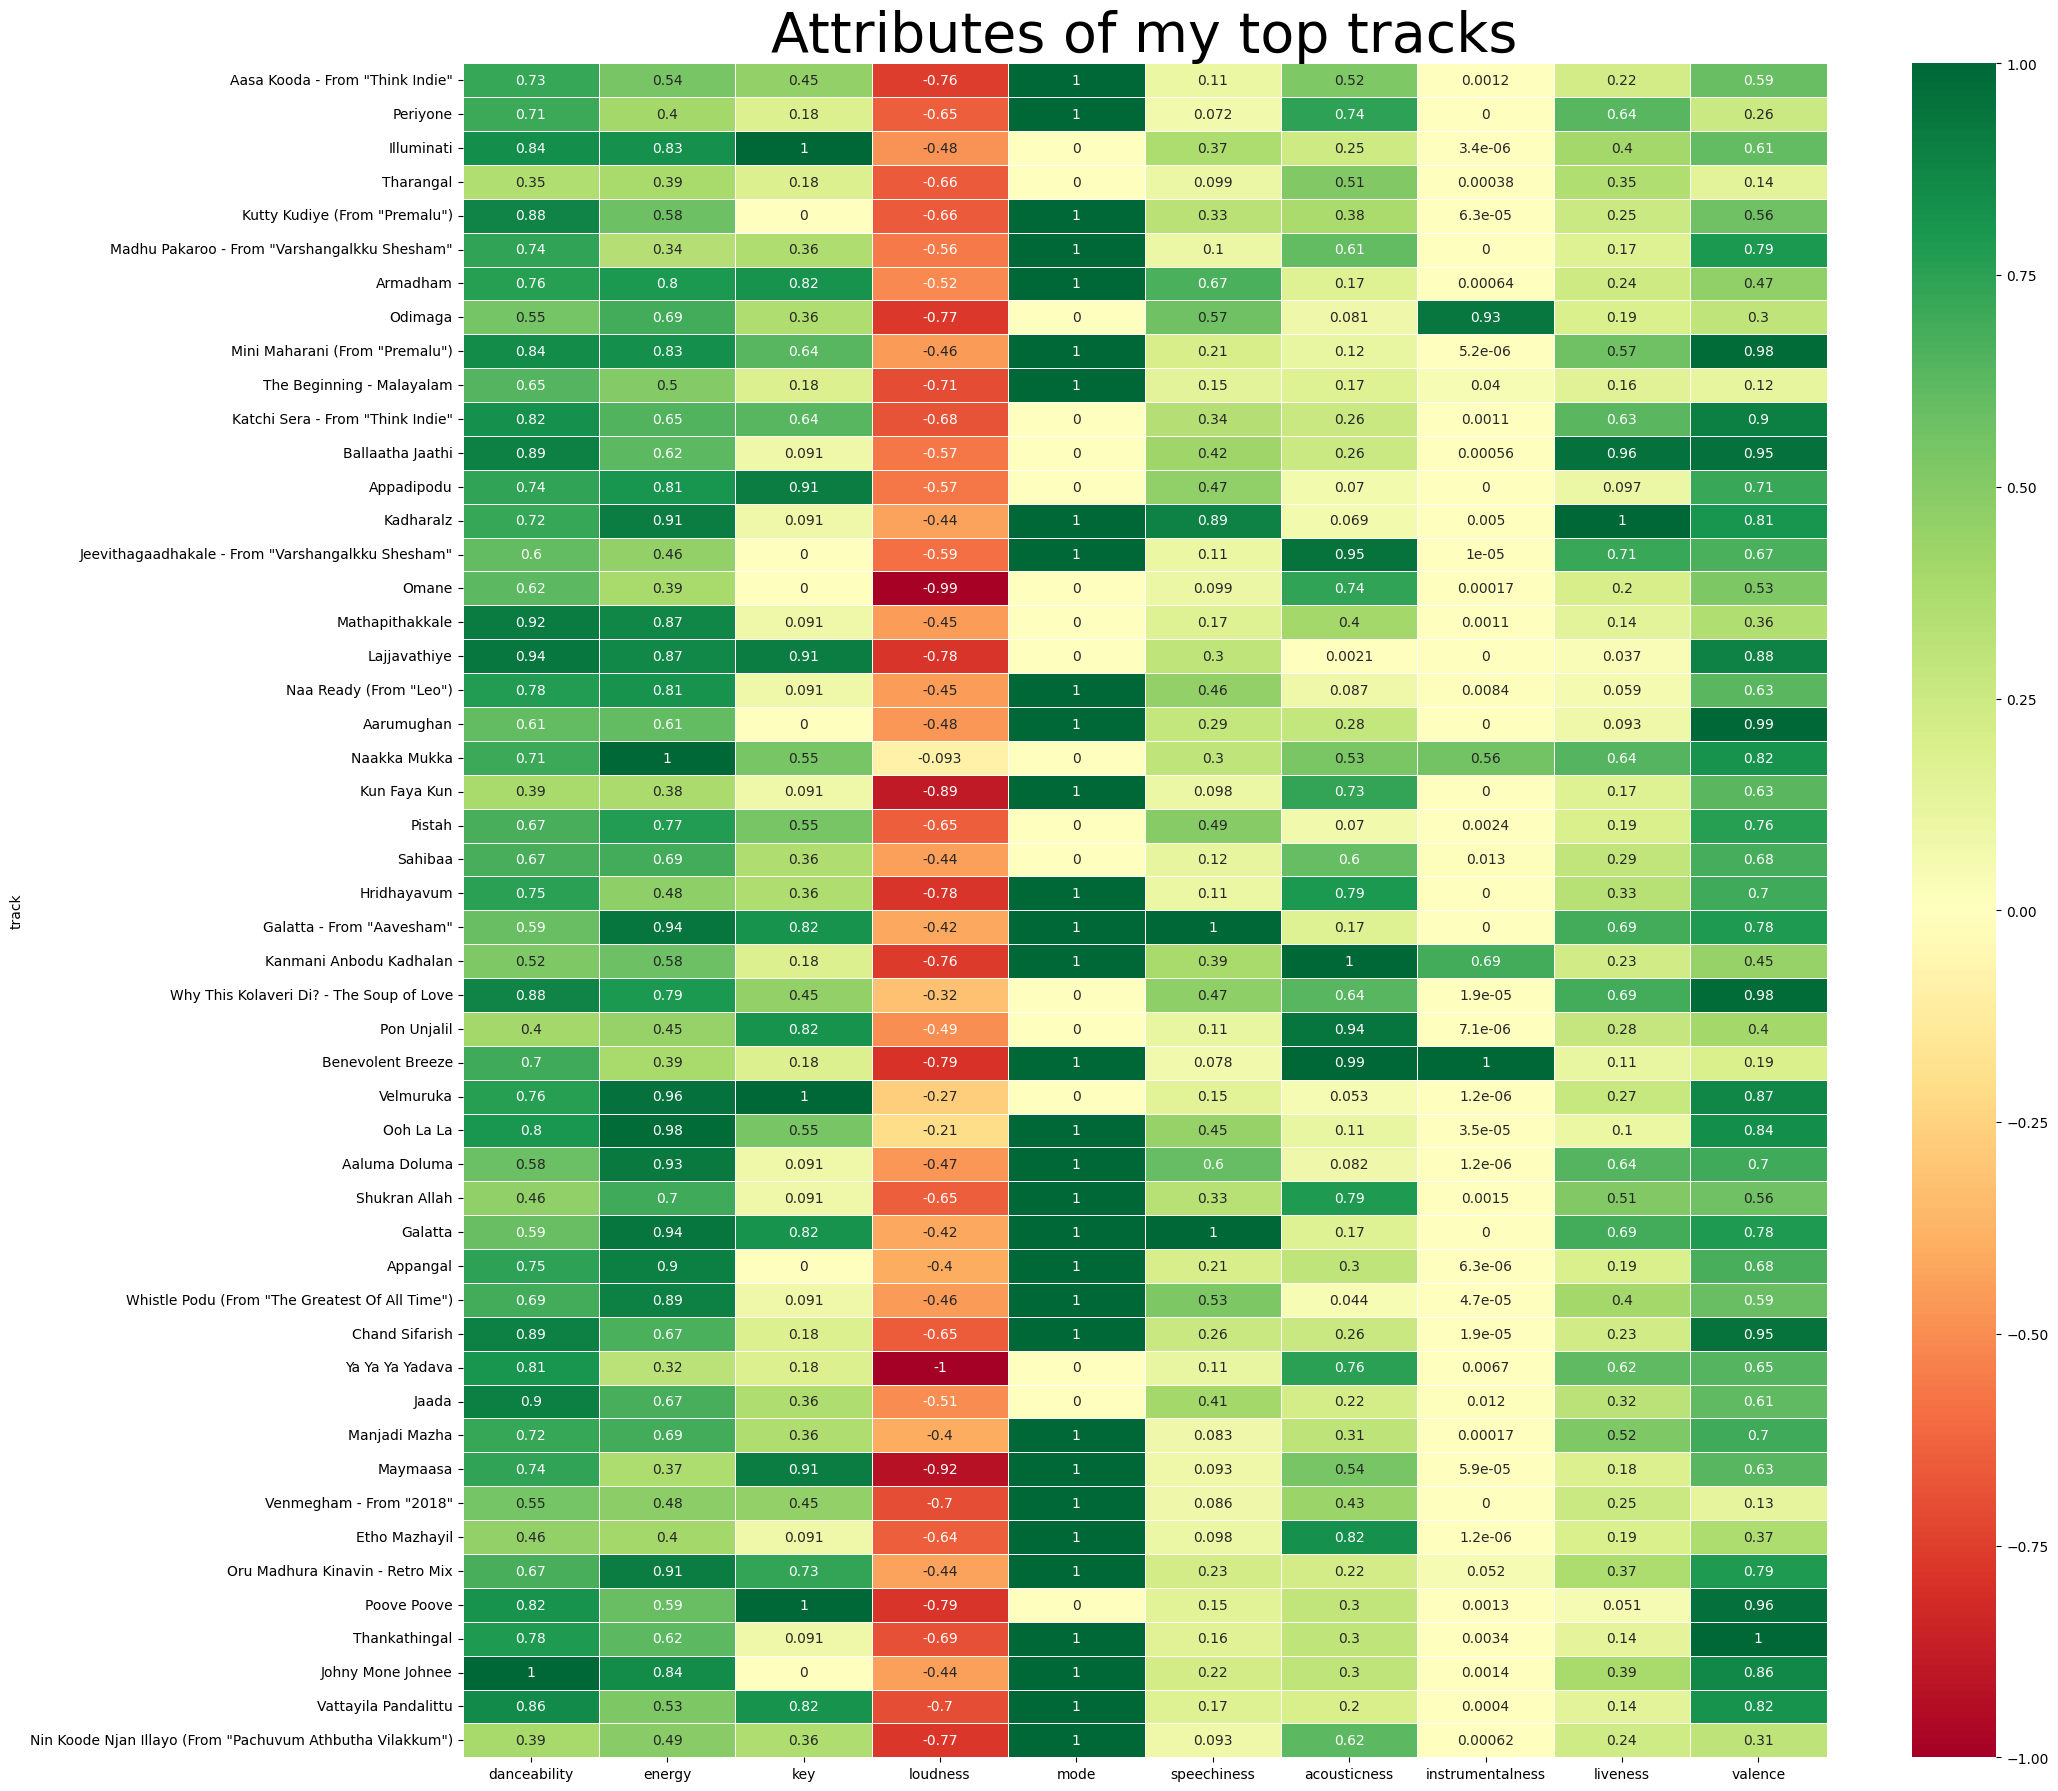

In [17]:
df_attributes['track'] = df['name']

plt.figure(figsize = (22,22))

sns.heatmap(df_attributes.set_index('track'), annot=True, linewidths=.5, cmap="RdYlGn")

plt.title("Attributes of my top tracks").set_size(40)

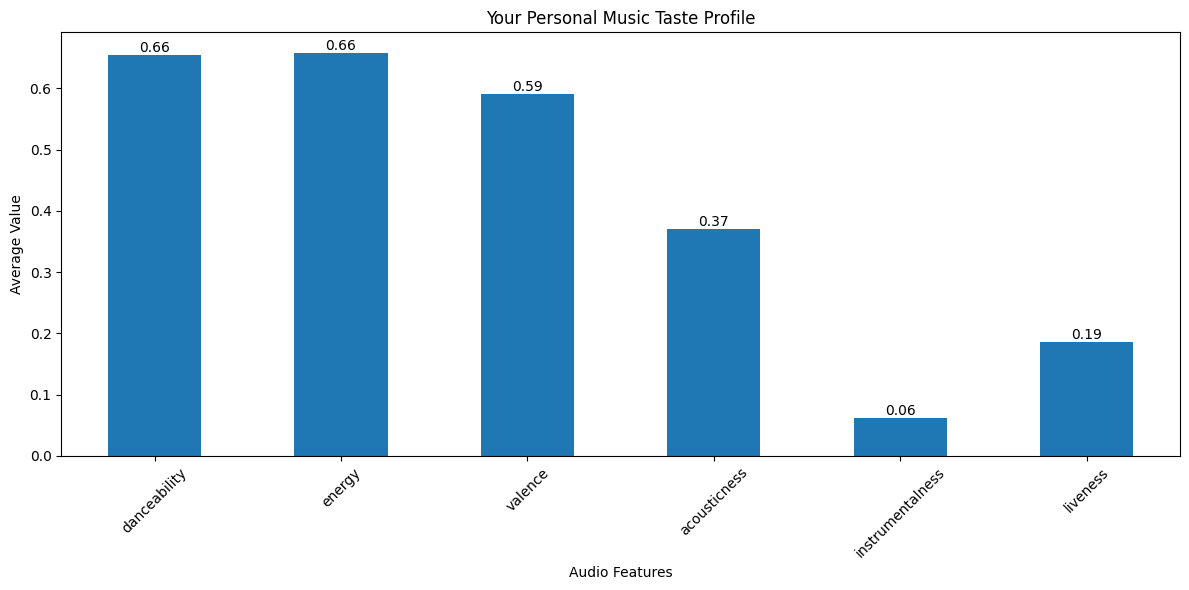

Your Personal Music Taste Profile:
Danceability: 0.66
Energy: 0.66
Valence: 0.59
Acousticness: 0.37
Instrumentalness: 0.06
Liveness: 0.19


In [18]:




# Select the features we want to analyze
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness']

# Calculate the mean of each feature
profile = df[features].mean()

# Create a bar plot of the profile
plt.figure(figsize=(12, 6))
profile.plot(kind='bar')
plt.title('Your Personal Music Taste Profile')
plt.xlabel('Audio Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(profile):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Print the profile
print("Your Personal Music Taste Profile:")
for feature, value in profile.items():
    print(f"{feature.capitalize()}: {value:.2f}")